In [2]:
import os 
excel_file = r'C:\Users\ADMIN\Project\ETF_Predict_After_ETF_Project\Price Data\All.xlsx'


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:


# Đường dẫn đến file Excel
excel_file = r'C:\Users\ADMIN\Project\ETF_Predict_After_ETF_Project\Price Data\All.xlsx'

# Đọc file Excel
excel_data = pd.ExcelFile(excel_file)

# Lấy tên tất cả các sheet
sheet_names = ["ARKB", "BRRR", "IBIT", "BTCO", "BTC", "ETH", "FBTC", "HODL", "GBTC"]

# Lặp qua từng sheet và thực hiện các thao tác
for sheet_name in sheet_names:
    # Đọc dữ liệu của sheet hiện tại vào DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # In ra tên của sheet và một số dòng dữ liệu để kiểm tra
    print(f"Sheet: {sheet_name}")
    print(df.head())  # Hiển thị 5 dòng đầu tiên của DataFrame
    
    # Ví dụ vẽ biểu đồ giá
    if 'Date' in df.columns and 'Price' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df, x='Date', y='Price')
        plt.title(f'Price Over Time for {sheet_name}')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.show()


Sheet: ARKB
        Date   Open   High    Low  Close  Adj Close   Volume
0 2024-01-12  46.59  46.62  43.50  43.86      43.86  3436100
1 2024-01-16  43.30  43.67  42.31  43.51      43.51  2866500
2 2024-01-17  42.65  43.06  42.30  42.86      42.86  1250300
3 2024-01-18  42.80  42.92  40.71  40.95      40.95  2873600
4 2024-01-19  41.21  42.27  40.38  41.73      41.73  2089800
Sheet: BRRR
        Date   Open   High    Low  Close  Adj Close  Volume
0 2024-01-12  13.20  13.20  12.38  12.47      12.47  171600
1 2024-01-16  12.24  12.36  11.99  12.29      12.29  239100
2 2024-01-17  12.17  12.18  12.00  12.16      12.16   63400
3 2024-01-18  12.07  12.16  11.57  11.59      11.59  122400
4 2024-01-19  11.70  11.96  11.45  11.82      11.82  277700
Sheet: IBIT
        Date   Open   High    Low  Close  Adj Close    Volume
0 2024-01-16  24.70  24.86  24.04  24.72      24.72  15078200
1 2024-01-17  24.35  24.56  24.15  24.41      24.41  13964500
2 2024-01-18  24.35  24.47  23.20  23.34      23.34 

**Linear Regression Cho Adjusted P**

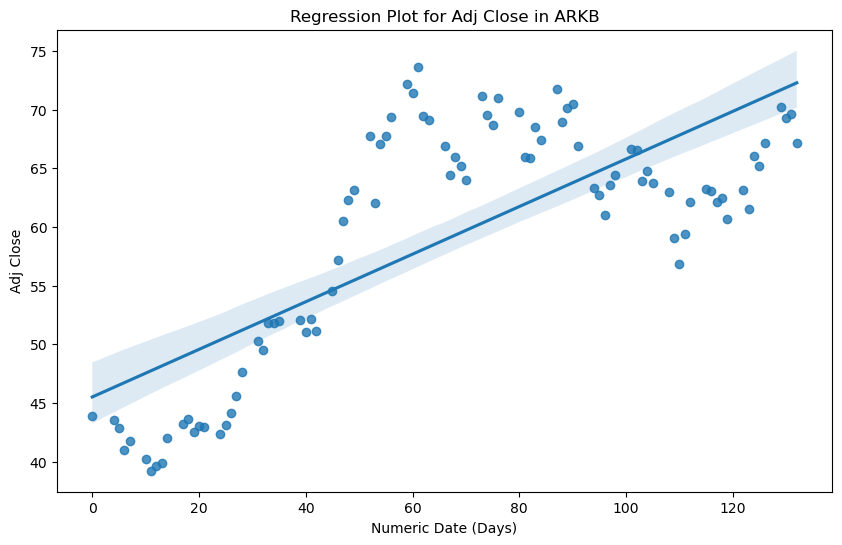

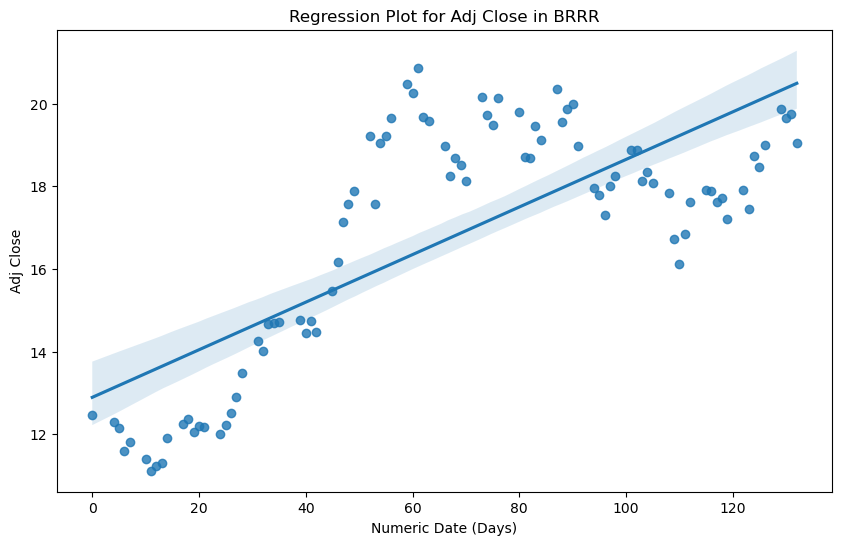

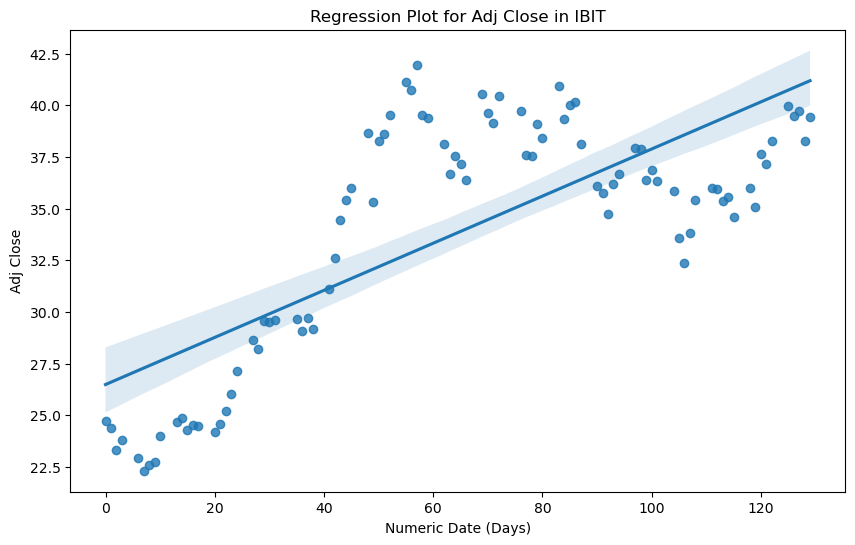

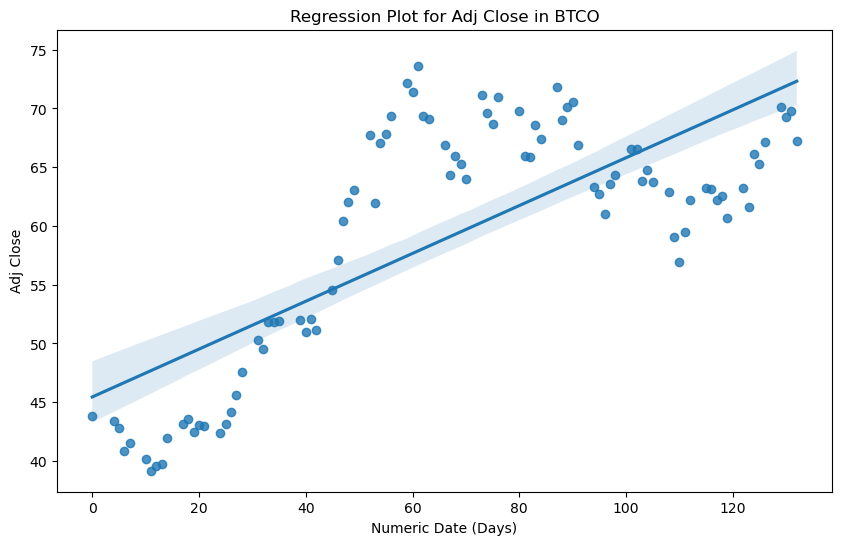

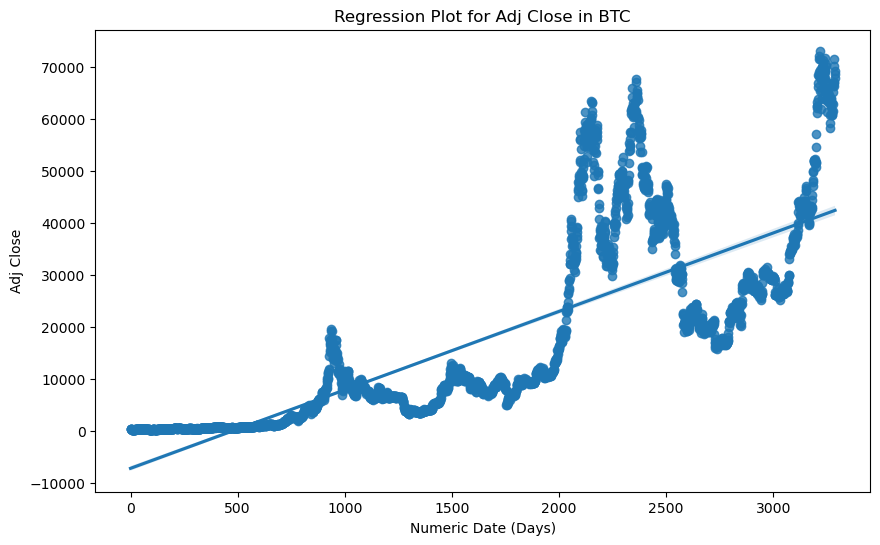

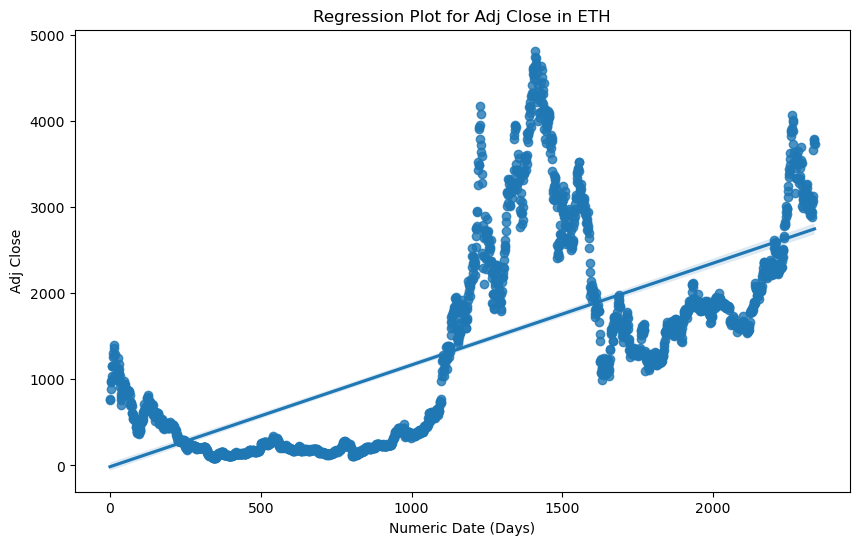

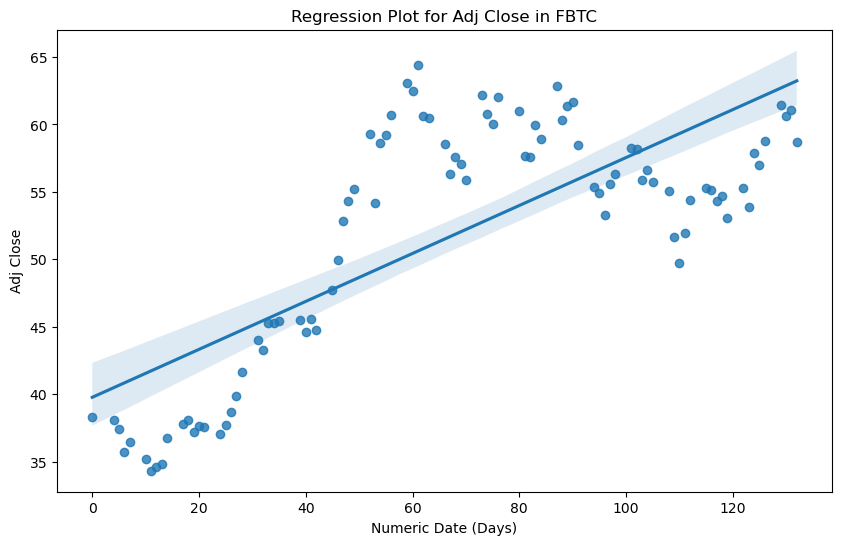

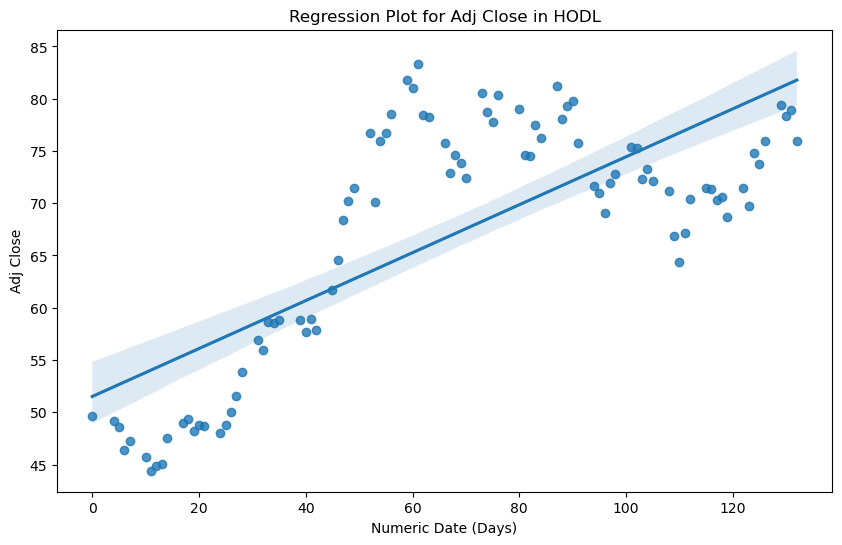

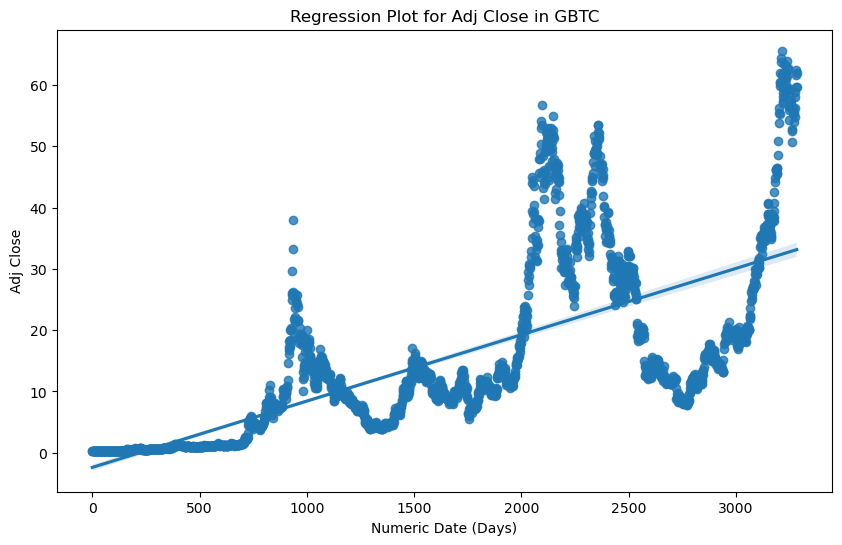

In [14]:


# Đường dẫn đến file Excel
excel_file = r'C:\Users\ADMIN\Project\ETF_Predict_After_ETF_Project\Price Data\All.xlsx'

# Đọc file Excel
excel_data = pd.ExcelFile(excel_file)

# Lấy tên tất cả các sheet
sheet_names = ["ARKB", "BRRR", "IBIT", "BTCO", "BTC", "ETH", "FBTC", "HODL", "GBTC"]

# Lặp qua từng sheet và vẽ biểu đồ regression cho cột "Adj Close"
for sheet_name in sheet_names:
    # Đọc dữ liệu của sheet hiện tại vào DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Tính số ngày kể từ ngày đầu tiên trong dataset
    start_date = df['Date'].min()
    df['NumericDate'] = (df['Date'] - start_date).dt.days
    
    # Vẽ biểu đồ regression cho cột "Adj Close"
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x='NumericDate', y='Adj Close')
    plt.title(f'Regression Plot for Adj Close in {sheet_name}')
    plt.xlabel('Numeric Date (Days)')
    plt.ylabel('Adj Close')
    plt.savefig(rf'C:\Users\ADMIN\Project\ETF_Predict_After_ETF_Project\Python\Code and Chart\Linear_regression\{sheet_name}_Regression_Plot.png')
    plt.show()


In [31]:
import pandas as pd

# Đường dẫn đến file Excel
excel_file = r'C:\Users\ADMIN\Project\ETF_Predict_After_ETF_Project\Price Data\All.xlsx'

# Khoảng thời gian của từng quỹ
quy_dates = {
    "BTC": ("2015-05-24", "2024-05-24"),
    "ETH": ("2017-12-31", "2024-05-24"),
    "GBTC": ("2015-05-28", "2024-05-24"),
    "ARKB": ("2024-01-12", "2024-05-24"),
    "BRRR": ("2024-01-12", "2024-05-24"),
    "IBIT": ("2024-01-12", "2024-05-24"),
    "BTCO": ("2024-01-12", "2024-05-24"),
    "FBTC": ("2024-01-12", "2024-05-24"),
    "HODL": ("2024-01-12", "2024-05-24")
}

# Lặp qua từng quỹ và thêm các cột mới
for sheet_name, (start_date, end_date) in quy_dates.items():
    # Đọc dữ liệu của quỹ hiện tại vào DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Chọn dữ liệu chỉ trong khoảng thời gian của quỹ
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
    # Tính toán RSI (Relative Strength Index)
    delta = df['Close'].diff()
    gain = delta.mask(delta < 0, 0)
    loss = -delta.mask(delta > 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    df['RSI'] = rsi
    
    # Tính toán Stochastic RSI
    rsi_stoch = (rsi - rsi.rolling(window=14).min()) / (rsi.rolling(window=14).max() - rsi.rolling(window=14).min())
    df['Stock RSI'] = rsi_stoch
    
    # Tính toán MACD (Moving Average Convergence Divergence)
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=9, adjust=False).mean()
    df['MACD'] = macd
    df['Signal'] = signal
    
    # In ra và kiểm tra DataFrame sau khi thêm các cột mới
    print(f"DataFrame for {sheet_name} with new columns:")
    print(df.head())  # In ra 5 dòng đầu tiên của DataFrame


DataFrame for BTC with new columns:
        Date    Open    High     Low   Close  Adj Close    Volume  RSI  \
0 2015-05-24  238.98  241.98  238.81  240.95     240.95  11508000  NaN   
1 2015-05-25  240.93  241.02  236.64  237.11     237.11  14423900  NaN   
2 2015-05-26  237.10  238.24  235.69  237.12     237.12  16425000  NaN   
3 2015-05-27  237.07  238.64  236.70  237.28     237.28  18837000  NaN   
4 2015-05-28  237.26  237.82  236.65  237.41     237.41  13829600  NaN   

   Stock RSI      MACD    Signal  
0        NaN  0.000000  0.000000  
1        NaN -0.306325 -0.061265  
2        NaN -0.542034 -0.157419  
3        NaN -0.707766 -0.267488  
4        NaN -0.819177 -0.377826  
DataFrame for ETH with new columns:
        Date    Open     High     Low   Close  Adj Close      Volume  RSI  \
0 2017-12-31  712.21   760.35  710.12  756.73     756.73  2554269952  NaN   
1 2018-01-01  755.76   782.53  742.00  772.64     772.64  2595760128  NaN   
2 2018-01-02  772.35   914.83  772.35  884

In [47]:
import pandas as pd

# Đường dẫn đến file Excel
excel_file = r'C:\Users\ADMIN\Project\ETF_Predict_After_ETF_Project\Price Data\All.xlsx'

# Khoảng thời gian của từng quỹ
quy_dates = {
    "BTC": ("2015-05-24", "2024-05-24"),
    "ETH": ("2017-12-31", "2024-05-24"),
    "GBTC": ("2015-05-28", "2024-05-24"),
    "ARKB": ("2024-01-12", "2024-05-24"),
    "BRRR": ("2024-01-12", "2024-05-24"),
    "IBIT": ("2024-01-12", "2024-05-24"),
    "BTCO": ("2024-01-12", "2024-05-24"),
    "FBTC": ("2024-01-12", "2024-05-24"),
    "HODL": ("2024-01-12", "2024-05-24")
}

# Lặp qua từng quỹ và tính toán RSI
for sheet_name, (start_date, end_date) in quy_dates.items():
    # Đọc dữ liệu của quỹ hiện tại vào DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Chọn dữ liệu chỉ trong khoảng thời gian của mỗi quỹ
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
    # Tính toán delta và gain/loss
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # Tính toán giá trị trung bình của gain và loss trong 14 ngày
    avg_gain = gain.rolling(window=14, min_periods=1).mean()
    avg_loss = loss.rolling(window=14, min_periods=1).mean()
    
    # Tính toán RS (Relative Strength)
    rs = avg_gain / avg_loss
    
    # Tính toán RSI
    rsi = 100 - (100 / (1 + rs))
    
    # Thêm cột RSI vào DataFrame
    df['RSI'] = rsi
    
    # In ra và kiểm tra DataFrame sau khi thêm cột RSI
    print(f"DataFrame for {sheet_name} with RSI column:")
    print(df.head())  # In ra 5 dòng đầu tiên của DataFrame


DataFrame for BTC with RSI column:
        Date    Open    High     Low   Close  Adj Close    Volume       RSI
0 2015-05-24  238.98  241.98  238.81  240.95     240.95  11508000       NaN
1 2015-05-25  240.93  241.02  236.64  237.11     237.11  14423900  0.000000
2 2015-05-26  237.10  238.24  235.69  237.12     237.12  16425000  0.259740
3 2015-05-27  237.07  238.64  236.70  237.28     237.28  18837000  4.239401
4 2015-05-28  237.26  237.82  236.65  237.41     237.41  13829600  7.246377
DataFrame for ETH with RSI column:
        Date    Open     High     Low   Close  Adj Close      Volume    RSI
0 2017-12-31  712.21   760.35  710.12  756.73     756.73  2554269952    NaN
1 2018-01-01  755.76   782.53  742.00  772.64     772.64  2595760128  100.0
2 2018-01-02  772.35   914.83  772.35  884.44     884.44  5783349760  100.0
3 2018-01-03  886.00   974.47  868.45  962.72     962.72  5093159936  100.0
4 2018-01-04  961.71  1045.08  946.09  980.92     980.92  6502859776  100.0
DataFrame for GBTC

In [49]:
# In ra và kiểm tra 10 dòng cuối cùng của DataFrame sau khi thêm cột RSI
print(f"Last 10 rows of DataFrame for {sheet_name} with RSI column:")
print(df.tail(10))


Last 10 rows of DataFrame for HODL with RSI column:
         Date   Open   High    Low  Close  Adj Close  Volume        RSI
82 2024-05-10  71.16  71.39  68.14  68.67      68.67  118000  35.607036
83 2024-05-13  71.07  71.81  70.82  71.48      71.48  118400  42.697925
84 2024-05-14  70.16  70.39  69.17  69.69      69.69   70500  44.726248
85 2024-05-15  72.79  75.25  72.44  74.78      74.78  217200  52.622498
86 2024-05-16  74.74  75.18  73.14  73.79      73.79   85900  52.877947
87 2024-05-17  75.05  76.36  74.67  75.95      75.95  160900  57.878989
88 2024-05-20  75.87  79.43  75.61  79.38      79.38  125300  71.541366
89 2024-05-21  80.32  80.68  78.30  78.31      78.31  181700  75.072046
90 2024-05-22  78.99  80.00  78.41  78.88      78.88  299900  72.894634
91 2024-05-23  78.47  78.53  75.49  75.94      75.94  175600  61.012258


**Vì MACD và Signal import chỉ số ra table bị lỗi nên chúng ta sẽ lấy 3 chỉ số MA, RSI và Stock RSI**

In [78]:
import pandas as pd

# Đường dẫn đến file Excel
excel_file = r'C:\Users\ADMIN\Project\ETF_Predict_After_ETF_Project\Price Data\All.xlsx'

# Khoảng thời gian của từng quỹ
quy_dates = {
    "ARKB": ("2024-01-12", "2024-05-24"),
    "BRRR": ("2024-01-12", "2024-05-24"),
    "IBIT": ("2024-01-12", "2024-05-24"),
    "BTCO": ("2024-01-12", "2024-05-24"),
    "BTC": ("2024-01-12", "2024-05-24"),
    "ETH": ("2024-01-12", "2024-05-24"),
    "FBTC": ("2024-01-12", "2024-05-24"),
    "HODL": ("2024-01-12", "2024-05-24"),
    "GBTC": ("2024-01-12", "2024-05-24")
}

# Lặp qua từng quỹ và tính toán MA, RSI và Stock RSI
for sheet_name, (start_date, end_date) in quy_dates.items():
    # Đọc dữ liệu của quỹ hiện tại vào DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Chọn dữ liệu chỉ trong khoảng thời gian của mỗi quỹ
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
    # Tính toán MA (Moving Average) với window là 50 ngày
    ma = df['Close'].rolling(window=50).mean()
    
    # Tính toán RSI (Relative Strength Index)
    delta = df['Close'].diff()
    gain = delta.mask(delta < 0, 0)
    loss = -delta.mask(delta > 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    # Tính toán Stock RSI
    rsi_stoch = (rsi - rsi.rolling(window=14).min()) / (rsi.rolling(window=14).max() - rsi.rolling(window=14).min())
    
    # Thêm cột MA, RSI và Stock RSI vào DataFrame
    df['MA'] = ma
    df['RSI'] = rsi
    df['Stock RSI'] = rsi_stoch
    
    # In ra và kiểm tra DataFrame sau khi thêm các cột MA, RSI và Stock RSI
    print(f"DataFrame for {sheet_name} with MA, RSI, and Stock RSI columns:")
    print(df)
    print("\n")


DataFrame for ARKB with MA, RSI, and Stock RSI columns:
         Date   Open   High    Low  Close  Adj Close   Volume       MA  \
0  2024-01-12  46.59  46.62  43.50  43.86      43.86  3436100      NaN   
1  2024-01-16  43.30  43.67  42.31  43.51      43.51  2866500      NaN   
2  2024-01-17  42.65  43.06  42.30  42.86      42.86  1250300      NaN   
3  2024-01-18  42.80  42.92  40.71  40.95      40.95  2873600      NaN   
4  2024-01-19  41.21  42.27  40.38  41.73      41.73  2089800      NaN   
..        ...    ...    ...    ...    ...        ...      ...      ...   
87 2024-05-17  66.38  67.55  65.85  67.14      67.14  1104300  65.8724   
88 2024-05-20  67.04  70.21  66.76  70.20      70.20  1873900  65.8886   
89 2024-05-21  70.98  71.32  69.15  69.31      69.31  1418600  65.8308   
90 2024-05-22  69.75  70.72  69.19  69.65      69.65   949900  65.7958   
91 2024-05-23  69.25  69.41  66.68  67.13      67.13  1562400  65.6662   

          RSI  Stock RSI  
0         NaN        NaN  
1

**Xóa NaN ở bảng mới**

In [84]:
import pandas as pd

# Đường dẫn đến file Excel
excel_file = r'C:\Users\ADMIN\Project\ETF_Predict_After_ETF_Project\Price Data\All.xlsx'

# Khoảng thời gian của từng quỹ
quy_dates = {
    "ARKB": ("2024-01-12", "2024-05-24"),
    "BRRR": ("2024-01-12", "2024-05-24"),
    "IBIT": ("2024-01-12", "2024-05-24"),
    "BTCO": ("2024-01-12", "2024-05-24"),
    "BTC": ("2024-01-12", "2024-05-24"),
    "ETH": ("2024-01-12", "2024-05-24"),
    "FBTC": ("2024-01-12", "2024-05-24"),
    "HODL": ("2024-01-12", "2024-05-24"),
    "GBTC": ("2024-01-12", "2024-05-24")
}

# Lặp qua từng quỹ và tính toán MA, RSI và Stock RSI
for sheet_name, (start_date, end_date) in quy_dates.items():
    # Đọc dữ liệu của quỹ hiện tại vào DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Chọn dữ liệu chỉ trong khoảng thời gian của mỗi quỹ
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
    # Tính toán MA (Moving Average) với window là 50 ngày
    ma = df['Close'].rolling(window=50).mean()
    
    # Tính toán RSI (Relative Strength Index)
    delta = df['Close'].diff()
    gain = delta.mask(delta < 0, 0)
    loss = -delta.mask(delta > 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    # Tính toán Stock RSI
    rsi_stoch = (rsi - rsi.rolling(window=14).min()) / (rsi.rolling(window=14).max() - rsi.rolling(window=14).min())
    
    # Thêm cột MA, RSI và Stock RSI vào DataFrame
    df['MA'] = ma
    df['RSI'] = rsi
    df['Stock RSI'] = rsi_stoch
    
    # Loại bỏ tất cả các dòng có giá trị NaN
    df = df.dropna(how='any')
    
    # In ra và kiểm tra DataFrame sau khi loại bỏ NaN và thêm các cột MA, RSI và Stock RSI
    print(f"DataFrame for {sheet_name} with MA, RSI, and Stock RSI columns (NaN rows removed):")
    print(df)
    print("\n")


DataFrame for ARKB with MA, RSI, and Stock RSI columns (NaN rows removed):
         Date   Open   High    Low  Close  Adj Close   Volume       MA  \
49 2024-03-25  67.03  71.24  67.01  71.13      71.13  4198700  53.9778   
50 2024-03-26  70.89  71.04  69.37  69.53      69.53  2508600  54.4912   
51 2024-03-27  71.70  71.84  68.44  68.70      68.70  2850900  54.9950   
52 2024-03-28  71.17  71.79  70.53  70.98      70.98  3175600  55.5574   
53 2024-04-01  70.15  70.20  68.11  69.78      69.78  1958600  56.1340   
54 2024-04-02  64.93  66.34  64.55  65.97      65.97  1976500  56.6188   
55 2024-04-03  65.76  66.99  65.57  65.87      65.87  1206300  57.1320   
56 2024-04-04  67.38  69.43  67.17  68.54      68.54  1844700  57.7184   
57 2024-04-05  66.97  68.66  66.87  67.43      67.43  1813500  58.2750   
58 2024-04-08  72.24  72.26  71.25  71.79      71.79  2078800  58.9134   
59 2024-04-09  70.74  71.02  68.23  68.98      68.98  2484900  59.4526   
60 2024-04-10  67.65  70.15  67.45  7